This study guide should reinforce and provide practice for all of the concepts you have seen in the past week. There are a mix of written questions and coding exercises, both are equally important to prepare you for the sprint challenge as well as to be able to speak on these topics comfortably in interviews and on the job.

If you get stuck or are unsure of something remember the 20 minute rule. If that doesn't help, then research a solution with google and stackoverflow. Only once you have exausted these methods should you turn to your Team Lead - they won't be there on your SC or during an interview. That being said, don't hesitate to ask for help if you truly are stuck.

Have fun studying!

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/bundickm/Study-Guides/master/data/cannabis.csv')
print('Shape:', df.shape, '\n')
df.head()

Shape: (2351, 6) 



,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


In [3]:
df.isnull().sum()

Strain          0
Type            0
Rating          0
Effects         0
Flavor         46
Description    33
dtype: int64

In [4]:
df = df.dropna(axis=0)

# Tokens

## Definitions

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*
<br/><br/>

**Natural Language Processing**: machine learning on regular languages, such as language.

**Token**: Each unique word, phrase, or character in the text 

**Corpus**: Group of documents

**Stopwords**: Not going to count - model disregards these words

**Statistical Trimming**: Taking out words taht appear too commonly or not commonly enough. TF-IDF

**Stemming**: Take off the ending, suffixes, prefixes. (does it with a broad sword)

**Lemmatization**: Takes off the verb forms, i.e. was, be, ran, run (lemmatization takes the root word without conjugation)

**Vectorization**:  Changes words into numbers.

## Questions of Understanding

1. What are at least 4 common cleaning tasks you need to do when creating tokens?
 1. Lowercase text and keep only alphanumeric characters
 2. Utilize generic stop words as well as those specific to the category
 3. Statistical trimming
 4. Lemmatization/Stemming - lemmatization is preferable


2. Why is it important to apply custom stopwords to our dataset in addition to the ones that come in a library like spaCy?
```
spaCy's stop word list are generic english stop words but there might be words that are specific to a topic that do not add value to the model. 
```


3. Explain the tradeoffs between statistical trimming, stemming, and lemmatizing.
```
Statistical trimming takes out the most common (above a certain percent) and least common words (below a certain percent), the theory being that these two outliers will not add to the training of the model. Whereas stemming and lemmatization both get the root word. Stemming works with a broad sword and does not check if the remaining characters are actually words vs lemmas which are actual words. 
```


4. Why do we need to vectorize our documents?
```
Machines do not understand language. Turning words into numeric representations or vectors allows the computers to better understand the word representation and thereby allow the manipulation - KNearestNeighbors, Sentiment Analysis, Cosine Similarity, etc. 
```

## Practice Problem

Write a function to tokenize the `Description` column. Make sure to include the following:
- Return the tokens in an iterable structure
- Normalize the case
- Remove non-alphanumeric characters such as punctuation, whitespace, unicode, etc.
- Apply stopwords and make sure to add stopwords specific to this dataset
- Lemmatize the tokens before returning them

In [5]:
import spacy

In [6]:
nlp = spacy.load("en_core_web_lg")

In [7]:
STOP_WORDS = nlp.Defaults.stop_words.union({"$", 'strain','', "flower", None, '-', ' ',"it's", 'i', "i'm", "i've", "it's", "don't", '-', 'got', 'it.',  'weed', 'effects', 'effect', 'high', 'consumer', 'breed'})


In [8]:
def tokenize(text):
  doc = nlp(str(text)) #casting as text
  return [token.lemma_.strip() for token in doc if (token.text.lower() not in STOP_WORDS) and (token.is_punct !=True)]

**Apply your function to `Description` and save the resulting tokens in a new column, `Tokens`**

In [9]:
df['tokens']= df['Description'].apply(tokenize)

In [10]:
df["tokens"]

0       [100, OG, 50/50, hybrid, pack, strong, punch, ...
1       [98, Aloha, White, Widow, especially, potent, ...
2       [1024, sativa, dominant, hybrid, breed, Spain,...
3       [13, Dawgs, hybrid, G13, Chemdawg, genetic, br...
4       [know, Kosher, Tangie, 24k, gold, 60, indica, ...
                              ...                        
2346    [Zeus, OG, , hybrid, cross, Pineapple, OG, Dea...
2347    [Zkittlez, indica, dominant, mix, Grape, Ape, ...
2348    [Zombie, Kush, Ripper, Seeds, come, different,...
2349    [look, transform, flesh, eat, monster, Zombie,...
2350    [Zoom, Pie, know, Zombie, Pie, heavy, indica, ...
Name: tokens, Length: 2277, dtype: object

In [11]:
df["tokens"][0]

['100',
 'OG',
 '50/50',
 'hybrid',
 'pack',
 'strong',
 'punch',
 'supposedly',
 'refer',
 'strength',
 'price',
 'start',
 'show',
 'Hollywood',
 'plant',
 '100',
 'OG',
 'tend',
 'produce',
 'large',
 'dark',
 'green',
 'bud',
 'stem',
 'user',
 'report',
 'strong',
 'body',
 'indica',
 'pain',
 'relief',
 'alert',
 'cerebral',
 'feeling',
 'thank',
 'sativa']

**Use the function below to create a `word_count` dataframe based off the `df['Tokens']` column you created.**

In [12]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
df["tokens"].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(20)

[('', 2331),
 ('indica', 1372),
 ('hybrid', 1275),
 ('cross', 1119),
 ('sativa', 1093),
 ('OG', 1029),
 ('Kush', 1005),
 ('aroma', 991),
 ('dominant', 941),
 ('sweet', 775),
 ('flavor', 740),
 ('body', 735),
 ('bud', 666),
 ('pain', 559),
 ('breed', 505),
 ('Seeds', 485),
 ('Haze', 438),
 ('flower', 425),
 ('create', 422),
 ('genetic', 420)]

In [13]:
def count(docs):
        word_counts = Counter()
        appears_in = Counter()
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [14]:
wc = count(df["tokens"])

**Run the line of code below, and then explain how to interpret the graph.**

In [15]:
import seaborn as sns

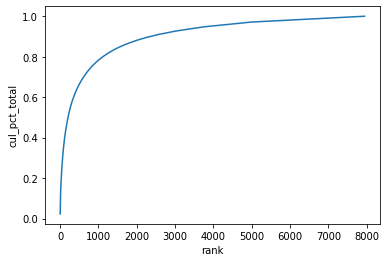

In [16]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [17]:
# Percentage of the the top 200 words

wc[wc['rank'] <= 200]['cul_pct_total'].max()

0.4954968974304109

In [18]:
import squarify
import matplotlib.pyplot as plt

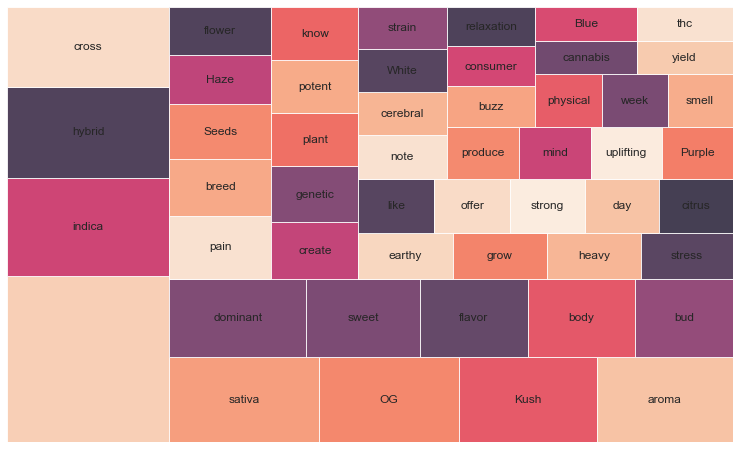

In [19]:
sns.set(rc={'figure.figsize':(13,8)})

wc_top20 = wc[wc['rank'] <= 50]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

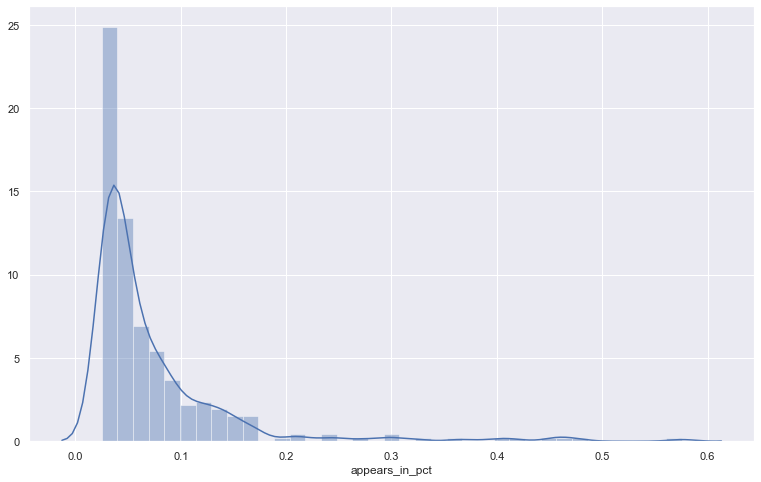

In [20]:
# Tree-Map w/ Words that appear in a least 2.5% of documents. 

wc = wc[wc['appears_in_pct'] >= 0.025]

sns.distplot(wc['appears_in_pct']);

# Vectorization

## Definitions

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*
<br/><br/>

**Vectorization**: Processing text data into a numeric format for machine learning models.

**Document Term Matrix (DTM)**: Creates a word count matrix of inputted documents/texts. Each column represents a word and each row represents a document. 

**Latent Semantic Analysis**:  Used by search engines to discover how a term and content work together to mean the same thing, even if they do not share keywords or synonyms.

**Term Frequency - Inverse Document Frequency (TF-IDF)**: Finds the percentage of words in document for each word. TF-IDF finds what is unique to each document.

**Word Embedding**: A learned representation for text where words that have the same meaning have a similar representation

**N-Gram**: Allows use of phrases or individual words

**Skip-Gram**: This method predicts the neighbors' of a word given a center word. We take a center words and a window of context(neighbor) to train the model and then predict context words. 

## Questions of Understanding

1. Why do we need to vectorize our documents?
```
We vectorize documents so that the words are in a format readable by a machine. 
```

2. How is TF-IDF different from simple word frequency? Why do we use TF-IDF over word frequency?
```
Word Frequency just gives a count of the words in a document losing context of the words themselves. TF-IDF finds the unique words in a document and gives a count of how many times it appears in the different documents. 
```

3. Why might we choose a word embedding approach over a bag-of-words approach when it comes to vectorization?
```
Word Embeddings try and preserve some of the context of the word so that machines can recognize phrases that go together versus just getting a count of each word and losing all meaning.
```

## Practice Problems

**Use the dataframe `df` above to complete the following.**

**Vectorize the `Tokens` column.**

In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [22]:
def gather_data(df_column):
    """ Produces List of Documents from a df column    
    returns list of strings 
    """
    data = []
    for row in df_column:
        data.append(' '.join(row))
    return data

In [23]:
data = gather_data(df['tokens'])

In [24]:
# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_df=.97,
                        min_df=3,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(data) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,,blueberry,cherry,sativa,09,09 cookie,1,1 afghani,1 genetics,1 hybrid,...,yoda,zealand,zest,zestful,zesty,zesty lemon,zion,zombie,zombie og,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


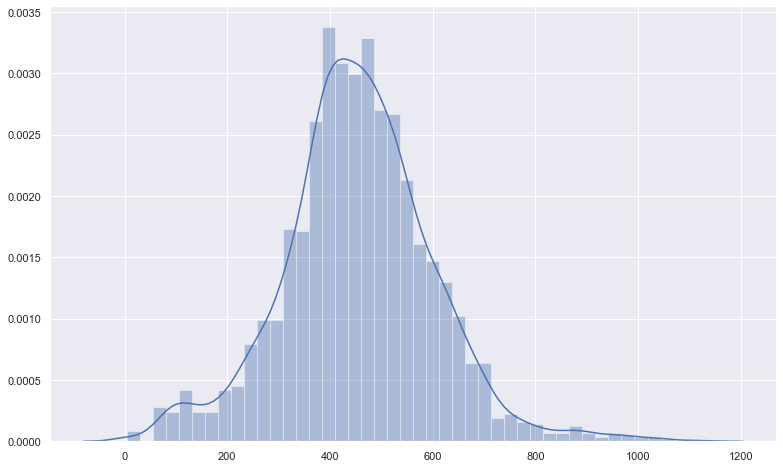

In [25]:
# Visualize document length distribution of Description data set

doc_len = [len(doc) for doc in df['Description']]

sns.distplot(doc_len);

**Build a Nearest Neighbors model from your dataframe and then find the 5 nearest neighbors to the strain "100-OG"**

In [26]:
from sklearn.neighbors import NearestNeighbors

In [27]:
nn = NearestNeighbors(n_neighbors=5, algorithm = "kd_tree")
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [28]:
nn.kneighbors([dtm.iloc[0]])

(array([[0., 1., 1., 1., 1.]]), array([[   0, 1698, 1605, 1606, 1607]]))

In [29]:
df["Description"][0]

'$100 OG is a 50/50 hybrid strain that packs a strong punch. The name supposedly refers to both its strength and high price when it first started showing up in Hollywood. As a plant, $100 OG tends to produce large dark green buds with few stems. Users report a strong body effect of an indica for pain relief with the more alert, cerebral feeling thanks to its sativa side.'

In [30]:
df["Description"][1698]

'Purple Kush is a pure indica strain that emerged from the Oakland area of California as the result of a Hindu Kush and Purple Afghani cross. Its aroma is subtle and earthy with sweet overtones typical of Kush varieties. Blissful, long-lasting euphoria blankets the mind while physical relaxation rids the body of pain, sleeplessness, and stress. Purple Kush will grow wide rather than tall, and will be ready for harvest following an 8 week flowering time.'

In [31]:
df["Description"][1606]

'Pineapple Thai is a strain that sets itself apart from the rest with a high 5% CBD content. This flower’s attractiveness comes from its ability to administer powerful pain relief without sedation, embodying true hybrid effects. Although Pineapple Thai is an option for daytime use, its strength may lead to a nighttime preference. Patients who desire the powerful medicinal effects of cannabis without the psychoactive inundation will find Pineapple Thai to be a staple in their arsenal.'

In [32]:
df["Description"][1605]

'Pineapple Super Silver Haze from Fire Bros. is a sativa strain that modifies the widely cherished Super Silver Haze with a Pineapple hybrid strain. This second parent is thought to be either Pineapple Express or Pineapple, a phenotype of Ed Rosenthal Super Bud. The Haze genetics in this strain come through in both flavor and effect, as Pineapple Super Silver Haze delivers a high-flying cerebral buzz alongside a spicy, zesty flavor. Its aroma is more of a tropical medley of candied mango, pineapple, and oranges. Like a cup of coffee, this sativa is a perfect pick-me-up with motivating, talkative, and creative effects and minimal heaviness in the body.'

In [33]:
df["Description"][1607]

'Bring together the popular clear-headed effects of Pineapple Express and the pain relief qualities of Trainwreck and you get this happy sativa. Pineapple Trainwreck has an earthy aroma and a fruity flavor that usually takes more after its pineapple parent. Long-lasting and potent, this strain hits hard at first, but mellows into a state where being sociable or getting things done is possible. The buzz tends to be more mellow than active, though, so don’t be surprised if verbal activity is all you get around to.'

**You will be putting together a classification model below, but before you do you'll need a baseline. Run the line of code below and then find the normalized value counts for the `Rating` column in `df`.**

In [34]:
df['Rating'] = df['Rating'].round().astype(int)

**What is the baseline accuracy?**

In [35]:
df["Rating"].value_counts(normalize=True)

4    0.601669
5    0.357049
0    0.028986
3    0.010979
2    0.000878
1    0.000439
Name: Rating, dtype: float64

**Visualize the rating counts from above**

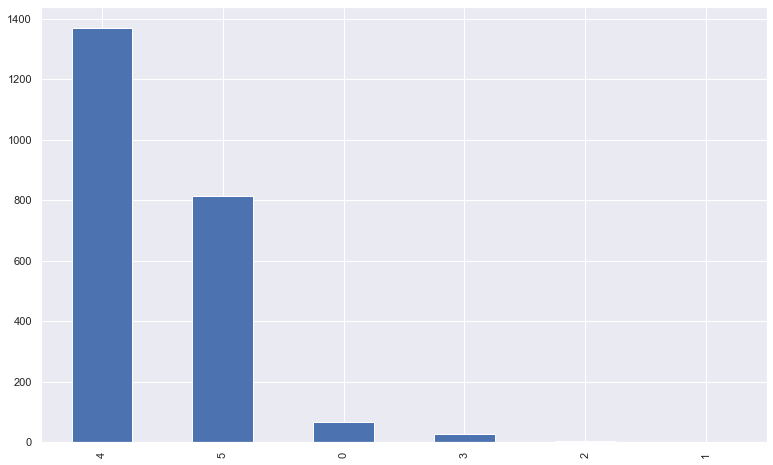

In [36]:
import matplotlib.pyplot as plt

df['Rating'].round().value_counts().plot(kind="bar")
plt.show;

**Use your vectorized tokens in the `df` dataframe to train a classification model**

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

In [38]:
rfc = RandomForestClassifier()

In [39]:
pipe = Pipeline([
                 #Vectorizer
                 ('vect', tfidf),
                 # Classifier
                 ('clf', rfc)
                ])

In [40]:
parameters = {
    'vect__max_df': ( 0.75, 1.0),
    'vect__min_df': (.02, .05),
    'vect__max_features': (500,1000),
    'clf__n_estimators':(5, 10,),
    'clf__max_depth':(15,20)
}

random_search = RandomizedSearchCV(pipe, parameters, cv=3, n_jobs=-1, verbose=1)
random_search.fit(df["Description"], df["Rating"])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Applications/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 10.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('vect',
                                              TfidfVectorizer(analyzer='word',
                                                              binary=False,
                                                              decode_error='strict',
                                                              dtype=<class 'numpy.float64'>,
                                                              encoding='utf-8',
                                                              input='content',
                                                              lowercase=True,
                                                              max_df=0.97,
                                                              max_features=None,
                                                              min_df=3,
                                                       

In [41]:
random_search.best_score_

nan

In [42]:
random_search.best_params_

{'vect__min_df': 0.05,
 'vect__max_features': 1000,
 'vect__max_df': 1.0,
 'clf__n_estimators': 10,
 'clf__max_depth': 15}

**Predict the score of the fake strain description below.**

```
'Afgooey, also known as Afgoo, is a potent indica strain that is believed to descend from an Afghani indica and Maui Haze. 
Its sativa parent may lend Afgoo some uplifting, creative qualities, but this strain undoubtedly takes after its indica 
parent as it primarily delivers relaxing, sleepy effects alongside its earthy pine flavor. Growers hoping to cultivate Afgoo 
may have a better chance of success indoors, but this indica can also thrive in Mediterranean climates outdoors.'
```

In [43]:
doc1 = 'Afgooey, also known as Afgoo, is a potent indica strain that is believed to descend from an Afghani indica and Maui Haze. Its sativa parent may lend Afgoo some uplifting, creative qualities, but this strain undoubtedly takes after its indica parent as it primarily delivers relaxing, sleepy effects alongside its earthy pine flavor. Growers hoping to cultivate Afgoo may have a better chance of success indoors, but this indica can also thrive in Mediterranean climates outdoors'

In [44]:
random_search.predict([doc1])

array([4])

In [45]:
random_search.predict_proba([doc1])

array([[0.01448136, 0.        , 0.        , 0.00350333, 0.62724127,
        0.35477404]])

Based on the classification model, it would rate Afgooey a 4. 

# Topic Modeling

## Questions of Understanding

**1. What is Latent Dirichlet Allocation? What is another name for LDA in NLP?**

Latent Dirichlet Allocation is based on the statistical model by mathematician Peter Dirichlet. It tries to group documents under a "topic". LDA is also called "topic modeling". 

**2. How do interpret the results of a topic modeling output?**

LDA examines a collection of documents to learn what words tend to be used in the same documents. This is a classic clustering problem. Those clusters are the topics.

## Practice Problems

**Find the top 5 topics of the `Description` column using LDA**

In [46]:
import gensim
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora

In [47]:
# A Dictionary Representation of all the words in our corpus
id2word = corpora.Dictionary(df["tokens"])

# Filter extreme values from the dataset
id2word.filter_extremes(no_below=5, no_above=0.95)

# Bag of Words(BOW) representation of our corpus
corpus = [id2word.doc2bow(text) for text in df["tokens"]]

In [48]:
len(id2word.keys())

2301

In [49]:
len(corpus)

2277

In [50]:
lda = LdaMulticore(corpus=corpus,       #data
                   id2word=id2word,     #dictionary 
                   num_topics = 5,      #I don't think there will be that many varying topics about tablets
                   passes=10,
                   workers=12
                  )

In [51]:
import re

In [52]:
#View Topics
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

topics = [' '.join(t[0:5]) for t in words]

for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
 indica hybrid Purple cross

------ Topic 1 ------
indica Kush  grow White

------ Topic 2 ------
 hybrid sweet cross flavor

------ Topic 3 ------
 sativa hybrid Haze cross

------ Topic 4 ------
 OG hybrid sativa Kush



**In a short paragraph, explain how to interpret the first topic your model came up with. If your topic words are difficult to interpret, explain how you could clean up the descriptions to improve your topics**

My topic words were difficult to interpret, it seems that within the corpus that it all centered around the strain types, flavors, and if hybrids the cross strains. There are several avenues I can take to clean up my data and improve my topics. One action I could take is to drill down on my common words, either throught the use of stop words or statistical trimming. Another thing that could be done is adjusting the number of topics, there might not be 5 distinct topics for the documents to fall under. . You can also play with the hyperparameters. 

**Use `pyLDAvis` to create a visualization to help you interpret your topic modeling results**

In [53]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [54]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.035457  0.050340       1        1  26.464430
3      0.015217  0.068069       2        1  23.340719
2     -0.066067 -0.031958       3        1  18.581675
1      0.107839 -0.024918       4        1  16.576307
0     -0.021532 -0.061532       5        1  15.036871, topic_info=         Term         Freq        Total Category  logprob  loglift
137      Kush   988.000000   988.000000  Default  30.0000  30.0000
2          OG   984.000000   984.000000  Default  29.0000  29.0000
829      Blue   289.000000   289.000000  Default  28.0000  28.0000
11     indica  1351.000000  1351.000000  Default  27.0000  27.0000
412     Alien   132.000000   132.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
266     dense    60.024689   231.525986   Topic5  -5.4407   0.5447
204    stress    66.654167   358.867767   Topic5  -5.3359   0.2112
21     sativa    77.076653  1063.811768   Topic5  -5.1907  -0.7301
192     heavy    61.714912   368.226746   Topic5  -5.4129   0.1085
230  cannabis    60.814041   290.383942   Topic5  -5.4276   0.3313

[412 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
31        1  0.304445       
31        2  0.255910       
31        3  0.135015       
31        4  0.127514       
31        5  0.176931       
...     ...       ...    ...
312       1  0.239042  yield
312       2  0.398403  yield
312       3  0.068815  yield
312       4  0.199202  yield
312       5  0.094168  yield

[987 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 3, 2, 1])

**Explain how to interpret the results of `pyLDAvis`**

This visualization shows us the word and topic distribution. The red gives us the per topic word distribution and the blue represents the overall term frequency within all the topics. 

**Create at least 1 more visualization to help you interpret the results of your topic modeling**

https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

In [56]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda, corpus=corpus, texts=df["tokens"])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.7738,", sativa, hybrid, Haze, cross, dominant, Blue,...","[100, OG, 50/50, hybrid, pack, strong, punch, ..."
1,1,1.0,0.4230,"indica, Kush, , grow, White, aroma, flower, bo...","[98, Aloha, White, Widow, especially, potent, ..."
2,2,1.0,0.3893,"indica, Kush, , grow, White, aroma, flower, bo...","[1024, sativa, dominant, hybrid, breed, Spain,..."
3,3,3.0,0.7426,", sativa, hybrid, Haze, cross, dominant, Blue,...","[13, Dawgs, hybrid, G13, Chemdawg, genetic, br..."
4,4,3.0,0.6056,", sativa, hybrid, Haze, cross, dominant, Blue,...","[know, Kosher, Tangie, 24k, gold, 60, indica, ..."
5,5,4.0,0.7206,", OG, hybrid, sativa, Kush, cross, dominant, i...","[3, Bears, OG, Mephisto, Genetics, autofloweri..."
6,6,4.0,0.9684,", OG, hybrid, sativa, Kush, cross, dominant, i...","[3, king, marijuana, holy, trinity, Headband, ..."
7,7,4.0,0.5802,", OG, hybrid, sativa, Kush, cross, dominant, i...","[indica, dominant, 303, OG, Colorado, breed, c..."
8,8,4.0,0.9726,", OG, hybrid, sativa, Kush, cross, dominant, i...","[3D, CBD, Snoop, Dogg, branded, line, cannabis..."
9,9,0.0,0.8734,", indica, hybrid, Purple, cross, aroma, purple...","[know, Optimus, Prime, indica, dominant, 3X, C..."


In [82]:
df_dominant_topic.isna().sum()

Document_No            0
Dominant_Topic        72
Topic_Perc_Contrib    72
Keywords              72
Text                  72
dtype: int64

In [83]:
df_dominant_topic = df_dominant_topic.dropna(axis=0)

In [87]:
df_dominant_topic.shape

(2205, 5)

In [85]:
import numpy as np

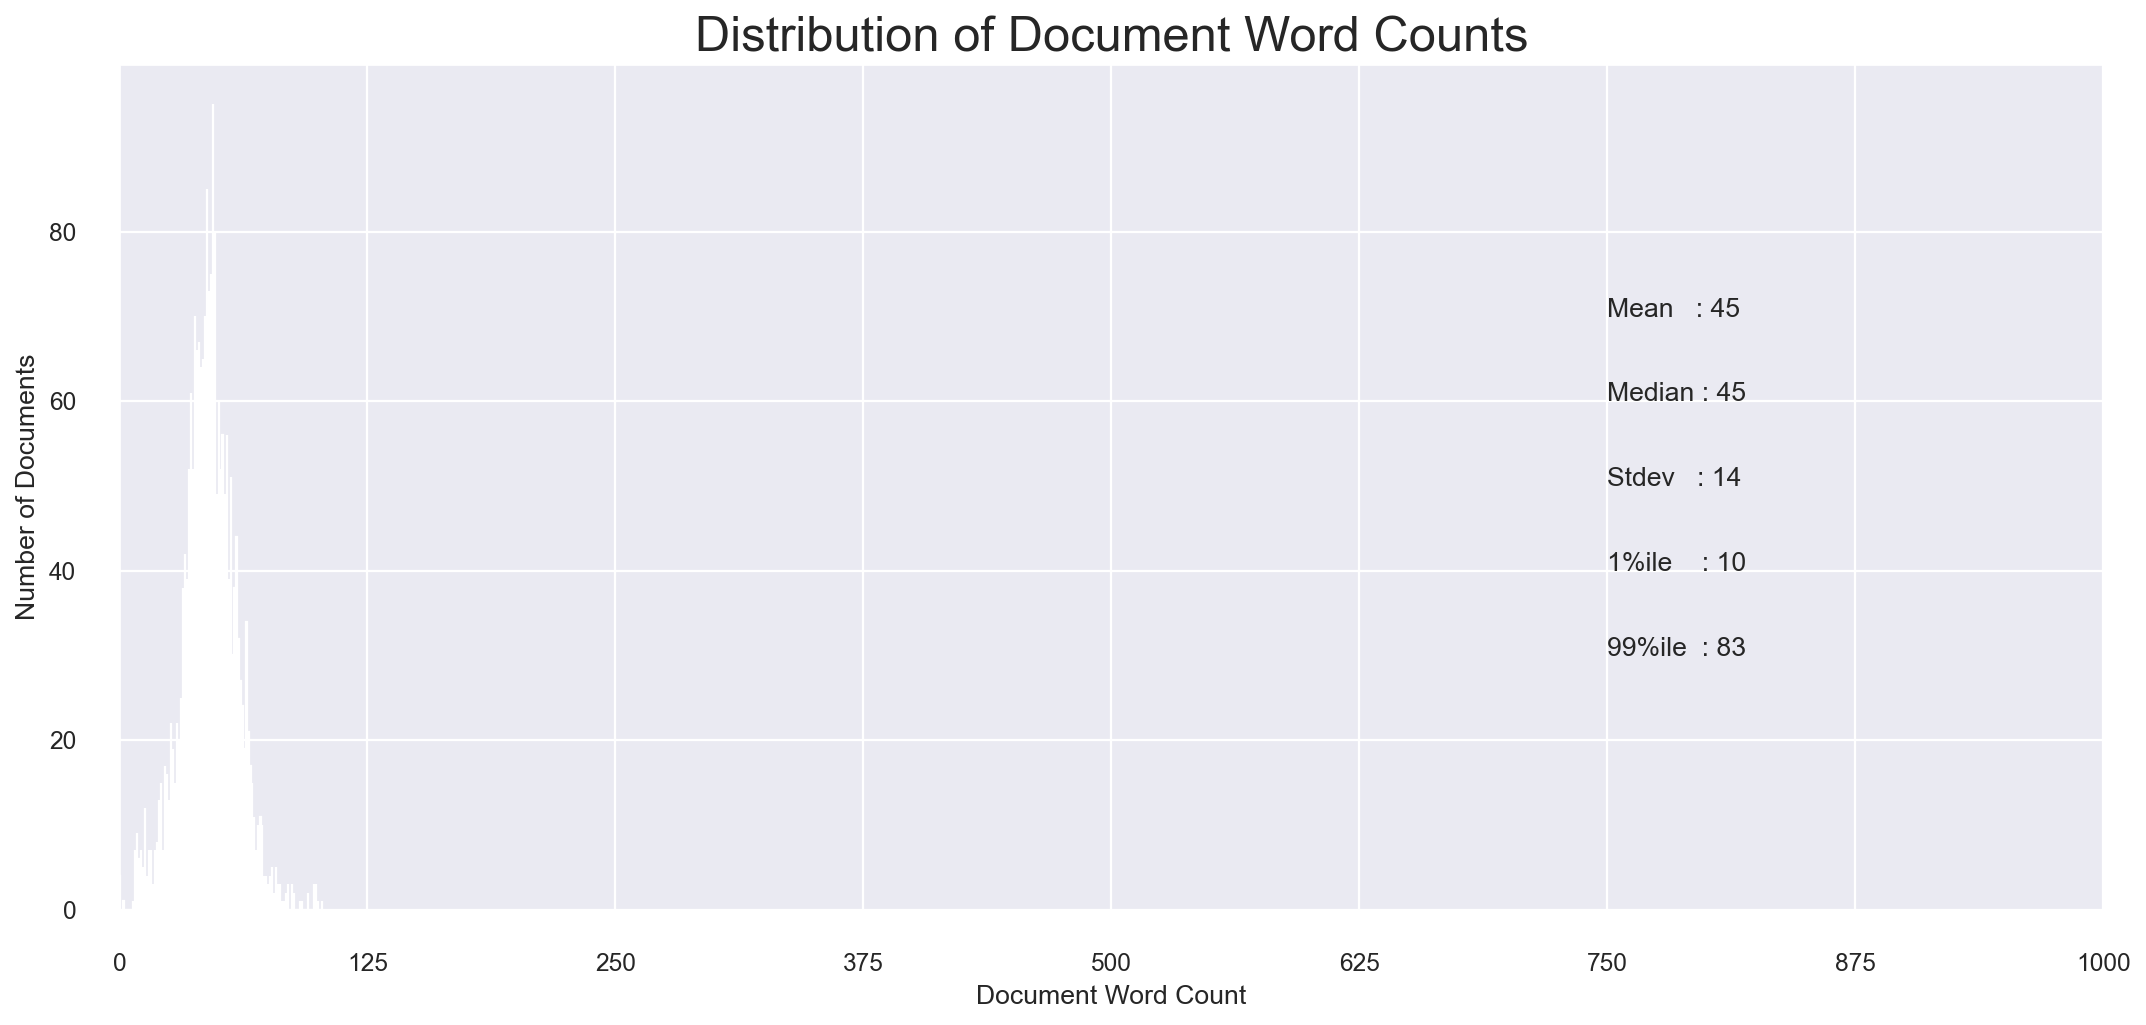

In [89]:
doc_lens = [len(d) for d in df_dominant_topic["Text"]]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='blue')
plt.text(750, 70, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750, 60, "Median : " + str(round(np.median(doc_lens))))
plt.text(750, 50, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750, 40, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750, 30, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

In [91]:
import seaborn as sns
import matplotlib.colors as mcolors

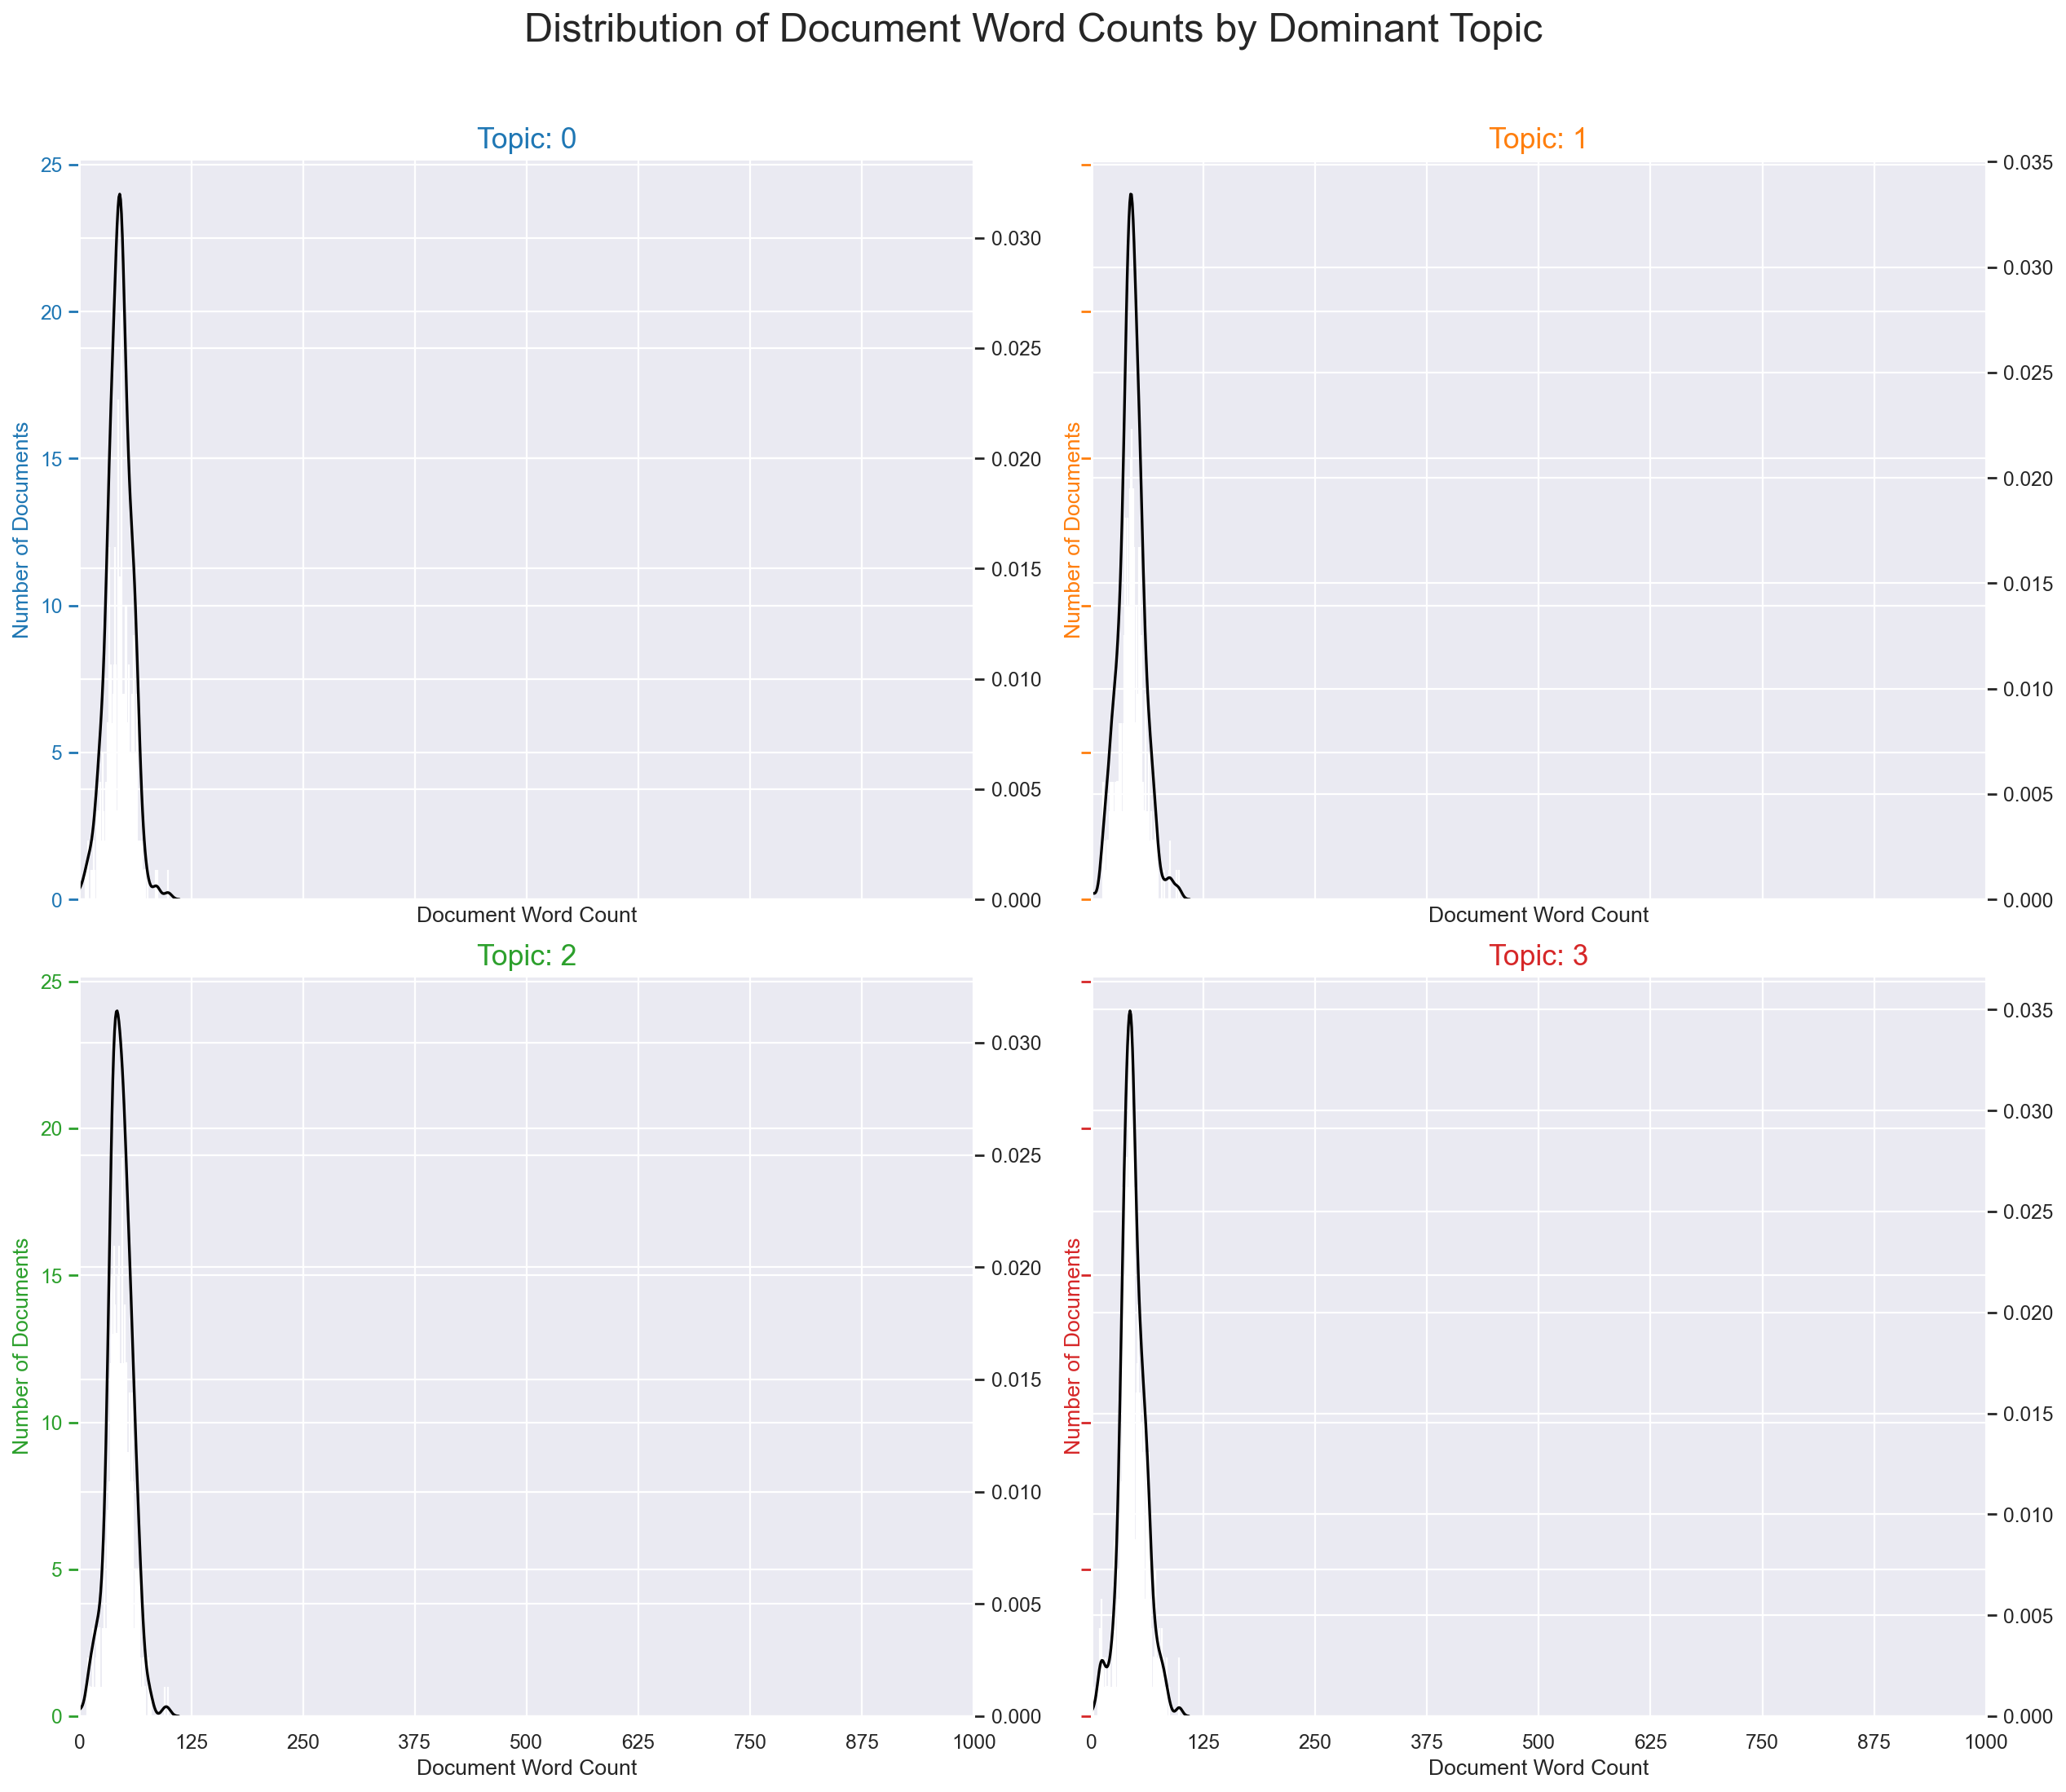

In [90]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()